# Coding parameter estimation

Given an equation below:

$$f(A) = 265 + x_{1} + x_{2} + \log(A)x_{3}$$

## Call Data

### Import packages
Import all related packages to find the parameter values

In [41]:
import numpy as np
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Call dataset
Call dataset that will be inserted into neural network

In [107]:
data = pd.read_csv('data_nn.csv')
data

,A,f(A)
0,0.002,106.632
1,0.004,106.632
2,0.006,106.632
3,0.008,106.632
4,0.010,106.632
...,...,...
1048569,2097.142,136.956
1048570,2097.144,136.956
1048571,2097.146,136.956
1048572,2097.148,136.956


Divide the data into train and test set

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data['A'],data['f(A)'], train_size=0.5)

Sort the data

In [11]:
X_train_sort = X_train.sort_values().values.reshape(1,X_train.shape[0])
X_test_sort  = X_test.sort_values().values.reshape(1,X_test.shape[0])
y_train_sort = y_train.sort_values().values.reshape(1,y_train.shape[0])
y_test_sort  = y_test.sort_values().values.reshape(1,y_test.shape[0])

Make sure the train and test set has uniform distributions.

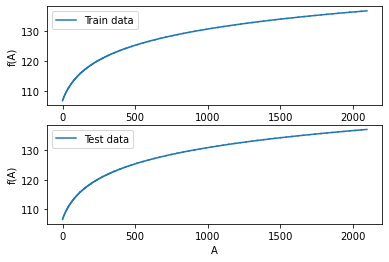

In [50]:
# Plot data train
mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure(1)
plt.subplot(211)
plt.plot(X_train_sort.reshape(X_train_sort.shape[1],1),y_train_sort.reshape(y_train_sort.shape[1],1), label='Train data')
plt.legend()
plt.ylabel('f(A)')
plt.subplot(212)
plt.plot(X_test_sort.reshape(X_test_sort.shape[1],1),y_test_sort.reshape(y_test_sort.shape[1],1), label='Test data')
plt.legend()
plt.ylabel('f(A)')
plt.xlabel('A')
plt.show()

## Build neural network

### Set number of layer: layer_sizes

By inserting the pair of X and Y, we will have three variables:

* n_x: size of input layer = 1
* n_h: size of hidden layer = 2
* n_y: size of output layer = 1

In [51]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0]
    n_h = 2
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

Ujikan layer_sizes() dengan memasukkan X_test_sort dan y_test_sort.

In [52]:
layer_sizes(X_test_sort, y_test_sort)

(1, 2, 1)

## Initialize model parameter : initialize_parameters

After getting the size of the input, hidden, and output layers, we will initialize the parameter values. The size of this parameter depends on the size of the layer.

* Make sure the parameter size used is correct
* Initialize with random values for weights
* Initialize with zero value for bias

In [53]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Insert the value of n_x, n_y, and n_h to initialize_parameters().

In [54]:
n_x, n_h, n_y = layer_sizes(X_test_sort, y_test_sort)
initialize_parameters(n_x, n_h, n_y)

{'W1': array([[-0.00416758],
        [-0.00056267]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[-0.02136196,  0.01640271]]),
 'b2': array([[0.]])}

Check the size of each parameter value.

In [82]:
print(initialize_parameters(1, 2, 1)['W1'].shape)
print(initialize_parameters(1, 2, 1)['b1'].shape)
print(initialize_parameters(1, 2, 1)['W2'].shape)
print(initialize_parameters(1, 2, 1)['b2'].shape)

(2, 1)
(2, 1)
(1, 2)
(1, 1)


## Forward_propagation

Implement `forward_propagation` to the equation below:

$$Z^{[1]} =  W^{[1]} \log{X} + b^{[1]}\tag{1}$$ 
$$\hat{Y} = 265 + W^{[2]} (Z^{[1]} + b^{[2]})\tag{2}$$

In [83]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, np.log10(X)) + b1
    Y_hat = np.dot(W2,Z1) + b2 + np.array([[265]])
    
    assert(Y_hat.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "Y_hat": Y_hat}
    
    return Y_hat, cache

In [84]:
n_x, n_h, n_y = layer_sizes(X_test_sort, y_test_sort)
parameters = initialize_parameters(n_x, n_h, n_y)
Y_hat, cache = forward_propagation(X_test_sort, parameters)
print(Y_hat.shape)
print(cache["Z1"].shape)

(1, 524287)
(2, 524287)


## Calculate Cost

After calculating $\hat{Y}$ value, which is a collection of $\hat{y}^{(i)}$ then we will calculate the cost function as follows:
$$J = \frac{1}{2m}\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2\tag{3}$$

We will implement `compute_cost()` to calcualte cost value **$J$**

In [85]:
# GRADED FUNCTION: compute_cost

def compute_cost(Y_hat, Y):
    """
    Computes the squared-error cost given in equation (3)
    
    Arguments:
    Y_hat -- The output of the second activation, of shape (1, number of examples)
    Y -- "true" labels (1, number of examples)

    Returns:
    cost -- squared-error cost given equation (3)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the squared-error cost
    sq_error = (Y - Y_hat)**2
    cost = (1/(2*m)) * np.sum(sq_error)
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
    
    return cost

In [86]:
cost = compute_cost(Y_hat, y_test_sort)
cost

9238.190665285167

## Implement Backpropagation

Implement `backward_propagation()`. Use the calculation results that have been obtained through manual derivation of the formula.

In [87]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    Z1 = cache["Z1"]
    Y_hat = cache["Y_hat"]

    # Backward propagation: calculate dW1, db1, dW2. 
    dY_hat = Y_hat - y_test_sort
    dW2 = (1/(2*m)) * np.dot(dY_hat,Z1.T)
    db2 = dY_hat
    dZ1 = np.dot(W2.T, dY_hat)
    dW1 = (1/(2*m)) * np.dot(dZ1, np.log10(X).T)
    db1 = (1/(2*m)) * dZ1
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [88]:
grads = backward_propagation(parameters, cache, X_test_sort, y_test_sort)
grads

{'dW1': array([[-4.15561127],
        [ 3.19087179]]),
 'db1': array([[-3.22633065e-06, -3.22633114e-06, -3.22633142e-06, ...,
         -2.60856801e-06, -2.60856801e-06, -2.60856801e-06],
        [ 2.47732687e-06,  2.47732724e-06,  2.47732746e-06, ...,
          2.00297995e-06,  2.00297995e-06,  2.00297995e-06]]),
 'dW2': array([[-0.8107325 , -0.10945768]]),
 'db2': array([[158.36778463, 158.36780865, 158.3678227 , ..., 128.04426506,
         128.04426506, 128.04426506]])}

## Update parameter value

In [89]:
def update_parameters(parameters, grads, learning_rate = 0.001):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = copy.deepcopy(parameters["b2"])
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                 }
    
    return parameters

In [90]:
parameters = update_parameters(parameters, grads)
parameters

{'W1': array([[-1.19672026e-05],
        [-3.75354006e-03]]),
 'b1': array([[ 3.22633065e-09,  3.22633114e-09,  3.22633142e-09, ...,
          2.60856801e-09,  2.60856801e-09,  2.60856801e-09],
        [-2.47732687e-09, -2.47732724e-09, -2.47732746e-09, ...,
         -2.00297995e-09, -2.00297995e-09, -2.00297995e-09]]),
 'W2': array([[-0.02055123,  0.01651217]]),
 'b2': array([[-0.15836778, -0.15836781, -0.15836782, ..., -0.12804427,
         -0.12804427, -0.12804427]])}

## Integration with neural network model

In [91]:
def nn_model(X, Y, n_h = 2, num_iterations = 5000, print_cost=True):
    """
    Arguments:
    X -- dataset of shape (1, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 100 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    # Set nn size
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    # Set parameters value
    parameters = initialize_parameters(n_x, n_h, n_y)
        
    # Loop (gradient descent)
    for i in range(0, num_iterations):
             
        # Forward propagation
        Y_hat, cache = forward_propagation(X, parameters)
        # Cost function
        cost = compute_cost(Y_hat, Y)
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
        # Gradient descent parameter update
        parameters = update_parameters(parameters, grads)

        # Print the cost every 100 iterations
        if i == 0:
            print ("Start learning process")
            print ("-------------------------------------")

        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [92]:
parameters = nn_model(X_test_sort, y_test_sort)

Start learning process
-------------------------------------
Cost after iteration 0: 9238.190665
Cost after iteration 100: 292.623262
Cost after iteration 200: 239.553676
Cost after iteration 300: 196.108688
Cost after iteration 400: 160.542797
Cost after iteration 500: 131.427068
Cost after iteration 600: 107.591711
Cost after iteration 700: 88.079087
Cost after iteration 800: 72.105235
Cost after iteration 900: 59.028370
Cost after iteration 1000: 48.323100
Cost after iteration 1100: 39.559316
Cost after iteration 1200: 32.384916
Cost after iteration 1300: 26.511650
Cost after iteration 1400: 21.703549
Cost after iteration 1500: 17.767435
Cost after iteration 1600: 14.545168
Cost after iteration 1700: 11.907285
Cost after iteration 1800: 9.747803
Cost after iteration 1900: 7.979960
Cost after iteration 2000: 6.532730
Cost after iteration 2100: 5.347967
Cost after iteration 2200: 4.378070
Cost after iteration 2300: 3.584072
Cost after iteration 2400: 2.934071
Cost after iteration 2500

In [93]:
def prediction(parameters, X):
    Z1 = np.dot(parameters["W1"], np.log10(X)) + parameters['b1']
    Y_hat = np.dot(parameters["W2"],Z1) + parameters['b2'] + np.array([[265]])
    return Y_hat

In [94]:
Y_hat = prediction(parameters, X_train_sort)

In [95]:
Y_hat

array([[ 64.48102409,  74.15958791,  80.33014495, ..., 136.79749629,
        136.79749617, 136.79747767]])

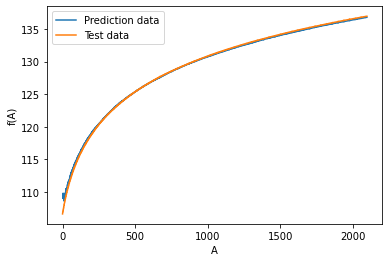

In [97]:
# Plot data
mpl.rcParams['agg.path.chunksize'] = 10000 # supaya bisa baca data ukuran banyak
plt.plot(X_test_sort.reshape(X_train_sort.shape[1],1)[1000:],Y_hat.reshape(Y_hat.shape[1],1)[1000:], label='Prediction data')
plt.plot(X_test_sort.reshape(X_train_sort.shape[1],1),y_train_sort.reshape(y_test_sort.shape[1],1), label='Test data')
plt.legend()
plt.ylabel('f(A)')
plt.xlabel('A')
plt.show()

---------------------------------------------------------------------------------------------------------------------------

Now we will try to convert the parameters we got into PL() equation

In [98]:
# PARAMETER W LAYER 2
W2 = parameters['W2']
# parameter W1 layer 2
W1_2 = W2[0][0]
# parameter W2 layer 2
W2_2 = W2[0][1]

In [99]:
# PARAMETER W LAYER 1
W1 = parameters['W1']
# parameter W1 layer 2
W1_1 = W1[0][0]
# parameter W1 layer 2
W2_1 = W1[1][0]

In [100]:
# PARAMETER b LAYER 2
b_2 = parameters['b2']

In [101]:
# PARAMETER b LAYER 1
b1 = parameters['b1']
# parameter b1 layer 1
b1_1 = b1[0]
# parameter b2 layer 1
b2_1 = b1[1]

In [102]:
W1_2*b1_1 + W2_2*b2_1 + b_2 + (W1_2*W1_1 + W2_2*W2_1)*np.log10(X_test_sort) + np.array([[299.06]])

array([[142.58413557, 142.49179018, 142.43777158, ..., 170.85745981,
        170.85745968, 170.85745943]])

In [103]:
x1 = W1_2*b1_1 + W2_2*b2_1
x2 = b_2
x3 = W1_2*W1_1 + W2_2*W2_1

## Estimated value of $x_{1}$

In [105]:
x1

array([-0.0113481 , -0.01079593, -0.01047293, ...,  0.00092032,
        0.00092032,  0.00092032])

## Estimated value of $x_{2}$

In [106]:
x2

array([[-275.33555312, -262.17015302, -254.46888766, ...,   18.0913829 ,
          18.09140102,   18.09143725]])

## Estimated value of $x_{3}$

In [104]:
x3

-44.04311148080923